# MARK SHEET DETECTION MODEL

## INSTALLS AND IMPORTS

In [1]:
from IPython import display  # For clearing output

In [2]:
#installing roboflow to download dataset and run YOLO
!pip install ultralytics roboflow opencv-python
display.clear_output()

In [21]:
#base imports for imaging and handling dataframes
import torch
import cv2
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np

#import YOLO pretarined model for training on custom dataset
from ultralytics import YOLO
from roboflow import Roboflow


## GPU CONNECTION CONFIRMATION

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ",device)

device:  cuda


In [6]:
!nvidia-smi

Mon Apr 14 13:42:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## TRAINING


In [ ]:
#Loading Dataset
rf = Roboflow(api_key="insert API key here")
project = rf.workspace("ml-bpqjm").project("msdm")
version = project.version(7)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MSDM-7 in yolov8:: 100%|██████████| 1086/1086 [00:00<00:00, 6398.82it/s]


In [10]:
#Loading in base Yolov8m model

#YOLOv8m Specifications:
# - Size(pixels) : 640
# - Speed Cpu : 234.7
# - Tensor : 1.83
# - Params : 25.9

model = YOLO("yolov8m.yaml")

In [11]:
#Hyperparams
epochs = 100
batch = 8
imgsz = 640

In [12]:
model.train(
    data=f"/content/MSDM-7/data.yaml",
    epochs=epochs,
    batch=batch,
    imgsz=imgsz,
    device=device
)

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/MSDM-7/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=57

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.8MB/s]


AMP: checks passed ✅


train: Scanning /content/MSDM-7/train/labels... 477 images, 0 backgrounds, 0 corrupt: 100%|██████████| 477/477 [00:00<00:00, 2015.40it/s]

train: New cache created: /content/MSDM-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/MSDM-7/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 927.39it/s]

val: New cache created: /content/MSDM-7/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000164, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.21G       6.69      11.17      4.031        192        640: 100%|██████████| 60/60 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         31        830          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.84G      6.478      7.764      3.513         71        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         31        830          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.91G      4.938      6.391      3.265        264        640: 100%|██████████| 60/60 [00:16<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         31        830    0.00117     0.0288   0.000928   0.000183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.98G      3.851      5.523       2.67        138        640: 100%|██████████| 60/60 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         31        830          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.04G      3.093      4.839      2.332        209        640: 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         31        830    0.00353     0.0647    0.00405     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.11G      2.852       4.29      2.099        283        640: 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         31        830     0.0105      0.158     0.0144    0.00616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.18G      2.768      3.903      2.006        243        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         31        830     0.0194      0.241     0.0309     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.25G       2.74      3.637      1.911        242        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         31        830        0.3      0.142     0.0602     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.31G      2.537      3.286      1.776        164        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         31        830     0.0212      0.325     0.0764     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.38G      2.554      3.087      1.672        254        640: 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.576       0.19      0.152     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.62G      2.302      2.788      1.555        279        640: 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         31        830     0.0458      0.541      0.159     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.69G        2.2      2.532      1.475        253        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.394      0.328      0.291      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.76G      2.119      2.358      1.427        271        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         31        830      0.295      0.436      0.321      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.82G      2.069      2.237      1.401        145        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         31        830      0.346      0.423      0.357      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.89G      2.081      2.087      1.371        138        640: 100%|██████████| 60/60 [00:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.388      0.519      0.431      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.2G       1.92      1.957      1.346        178        640: 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830       0.37       0.53      0.494      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.27G      1.898      1.851      1.334        164        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830       0.51      0.564      0.542      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.5G      1.906      1.817      1.355        186        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.454      0.594      0.557      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.57G      1.866      1.711      1.296        370        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830      0.596      0.662      0.714      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.64G      1.825      1.663      1.296        258        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.584      0.669      0.664       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.84G      1.794      1.579      1.288        135        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.645      0.701      0.713      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.05G      1.779       1.56      1.272        137        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.645      0.721      0.709      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.12G      1.769      1.504      1.272        157        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.709      0.653      0.725      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.33G      1.745      1.462       1.28        257        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         31        830      0.724      0.747       0.83      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.39G      1.741      1.371      1.267        128        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.684      0.795      0.825      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.61G      1.741       1.33      1.263        211        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.753      0.791      0.855      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.85G      1.689      1.282      1.241        229        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.732      0.803      0.841      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.92G      1.711      1.264      1.251        258        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         31        830      0.823      0.848      0.907      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.15G      1.652      1.248      1.238        202        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         31        830      0.826      0.871      0.898      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.22G      1.693      1.253      1.246        132        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830      0.839      0.868      0.916      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.29G      1.628      1.178      1.226        132        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         31        830      0.873      0.895       0.93      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.5G      1.645      1.143      1.211        223        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         31        830      0.869      0.874      0.938      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.56G      1.623      1.095      1.189        262        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         31        830      0.874      0.919      0.937      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.96G      1.605      1.077      1.205        108        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.869      0.897      0.937      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.02G      1.608       1.07      1.198        131        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         31        830      0.865      0.921      0.937      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.09G      1.566      1.037      1.185        305        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.899      0.886      0.934      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.16G      1.593      1.033      1.187        352        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         31        830      0.861      0.898      0.917      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.35G      1.569      1.008      1.163        118        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         31        830      0.934      0.912      0.958      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.54G      1.582      1.014      1.209        216        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.913      0.913      0.958      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.61G      1.547      1.017      1.183        172        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.901      0.931      0.944      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.81G       1.54     0.9802      1.172        195        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         31        830       0.68       0.75      0.797      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        10G      1.575     0.9959      1.177        293        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         31        830      0.945      0.933      0.957      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.1G      1.558     0.9784      1.177        150        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.908       0.94      0.964      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.3G      1.539     0.9656      1.182        111        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.942      0.929      0.955      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.5G      1.545     0.9458      1.172        149        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         31        830      0.936      0.955      0.978      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.6G        1.5     0.9408       1.18        106        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.938      0.926      0.952      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.6G      1.506     0.9279      1.156        306        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         31        830      0.932      0.962       0.97      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.8G      1.505     0.9212      1.155        225        640: 100%|██████████| 60/60 [00:17<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.925      0.964      0.978      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        11G      1.486      0.904       1.15        224        640: 100%|██████████| 60/60 [00:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         31        830      0.917      0.962      0.966       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.1G      1.494     0.8937      1.147        218        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.934      0.963      0.978      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G      1.496     0.8939      1.154        231        640: 100%|██████████| 60/60 [00:17<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         31        830       0.94      0.963      0.979      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.5G      1.483     0.8827      1.149        186        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830       0.94      0.967       0.98      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.6G      1.488     0.8705      1.143        263        640: 100%|██████████| 60/60 [00:17<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.961      0.947      0.961      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.8G       1.46     0.8734       1.14        129        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         31        830      0.937      0.962      0.975      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.9G      1.476     0.8763      1.143        250        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         31        830      0.965      0.938      0.965      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.1G       1.46     0.8722      1.137        260        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         31        830      0.952      0.964      0.978      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.3G      1.492     0.8845       1.14        211        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         31        830      0.939      0.959      0.978      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.3G       1.47     0.8511      1.135        203        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.939       0.96      0.977      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.5G      1.448     0.8586      1.114        209        640: 100%|██████████| 60/60 [00:17<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830      0.951      0.974      0.983      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.6G      1.458     0.8551      1.134        412        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         31        830      0.944      0.973      0.979      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.8G      1.442     0.8481      1.111        245        640: 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830      0.923      0.946      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        13G       1.43     0.8197      1.117        129        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830       0.96      0.975      0.983      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.1G      1.435     0.8243      1.109        186        640: 100%|██████████| 60/60 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         31        830      0.961       0.97      0.984      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.3G      1.411     0.8062      1.111        206        640: 100%|██████████| 60/60 [00:17<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         31        830       0.96      0.973      0.981      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.04G      1.437     0.8333      1.133        121        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         31        830      0.946      0.975      0.981      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.45G      1.409     0.8089      1.111        135        640: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         31        830      0.959       0.98      0.986      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.45G      1.422     0.8071        1.1        156        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         31        830       0.96      0.976      0.985      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.45G       1.39     0.7926      1.108        280        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         31        830      0.965      0.969      0.981      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.45G      1.423      0.814      1.114         65        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         31        830      0.969      0.971      0.986       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.45G      1.379     0.7911      1.098        197        640: 100%|██████████| 60/60 [00:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.965      0.972      0.982       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.59G      1.357     0.7754        1.1        114        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         31        830       0.97      0.982       0.99      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.76G      1.381     0.7684      1.087        180        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.966      0.975      0.986      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.81G      1.395     0.7871      1.091        379        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         31        830      0.968       0.97      0.983      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.88G      1.382     0.7824      1.093        179        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.962      0.976      0.987      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.08G      1.347     0.7618      1.079        227        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         31        830      0.972      0.984       0.99      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.39G       1.36     0.7617      1.098        270        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         31        830      0.899      0.914      0.959      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.45G      1.376     0.7717       1.09        270        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         31        830       0.97       0.98      0.991      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.52G      1.347     0.7582      1.077        196        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.971      0.975      0.988      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.74G      1.338     0.7573      1.081        354        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         31        830      0.967      0.975      0.983      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       5.8G      1.335     0.7553      1.078        152        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         31        830      0.974      0.983       0.99      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         6G      1.329     0.7472       1.09        231        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.975      0.983      0.991      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.06G      1.337     0.7504      1.084        247        640: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         31        830      0.975       0.98      0.991       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.29G      1.335     0.7436      1.073        244        640: 100%|██████████| 60/60 [00:17<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.971      0.985      0.992      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.35G      1.327     0.7426      1.084        190        640: 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.969      0.987       0.99      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.55G      1.314     0.7372      1.075        163        640: 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830      0.966      0.976      0.988      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.74G      1.303     0.7371      1.071        157        640: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         31        830      0.978      0.985      0.991      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.97G      1.301     0.7276      1.066        179        640: 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         31        830      0.972      0.983      0.991      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.04G      1.301     0.7286      1.083        261        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         31        830      0.975      0.983      0.988      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.11G      1.297     0.7251      1.066        139        640: 100%|██████████| 60/60 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         31        830      0.977      0.984      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       7.3G      1.311     0.7246      1.073        158        640: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         31        830       0.97       0.98      0.988      0.675


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.37G       1.23     0.7066      1.108        124        640: 100%|██████████| 60/60 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         31        830      0.966      0.983      0.985      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.43G      1.224     0.6932      1.111        157        640: 100%|██████████| 60/60 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         31        830      0.973      0.979      0.986       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       7.5G      1.216     0.7014      1.107        164        640: 100%|██████████| 60/60 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         31        830      0.969       0.97      0.979      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.65G      1.222     0.6866      1.088        156        640: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         31        830      0.967      0.969      0.979      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       7.8G      1.186     0.6787      1.098        133        640: 100%|██████████| 60/60 [00:17<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         31        830      0.973      0.976      0.985      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.11G       1.22      0.682      1.081        138        640: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         31        830      0.972      0.978      0.986      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.18G      1.189     0.6776      1.096        112        640: 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         31        830      0.976       0.98      0.989      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.25G      1.195      0.675      1.096        193        640: 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         31        830      0.973      0.977      0.986      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.39G      1.187     0.6775      1.108        118        640: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         31        830      0.974      0.977      0.984      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.71G      1.187     0.6725      1.096        138        640: 100%|██████████| 60/60 [00:17<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         31        830      0.972      0.976      0.985      0.669



100 epochs completed in 0.544 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,872,763 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         31        830       0.97       0.98      0.988      0.674
                   10a         15         15      0.975          1      0.995      0.686
                   10b         14         14      0.973          1      0.995      0.662
                   10c          4          4      0.925          1      0.995      0.688
                   10d          8          8      0.985          1      0.995      0.695
                   10e          9          9          1      0.951      0.995      0.694
                    1a         30         30      0.991          1      0.995      0.717
                    1b         12         12      0.976          1      0.995        0.7
                    1c         10         10      0.969          1      0.995      0.736
                    1d          8          8      0.952          1      0.995      0.752
                    1e          4          4      0.941          1      0.995      0.722
                    2

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7890e25d7450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    

## DISPLAYING METRICS

In [13]:
#displaying metrics of model
metrics = model.val()
print(metrics)

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,872,763 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /content/MSDM-7/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


                   all         31        830       0.97       0.98      0.988      0.674
                   10a         15         15      0.974          1      0.995      0.686
                   10b         14         14      0.973          1      0.995      0.659
                   10c          4          4      0.925          1      0.995      0.688
                   10d          8          8      0.985          1      0.995      0.674
                   10e          9          9          1      0.955      0.995      0.692
                    1a         30         30      0.991          1      0.995      0.732
                    1b         12         12      0.975          1      0.995      0.688
                    1c         10         10      0.969          1      0.995      0.728
                    1d          8          8      0.952          1      0.995      0.746
                    1e          4          4      0.942          1      0.995      0.722
                    2

## TRAINING BATCH EXAMPLE

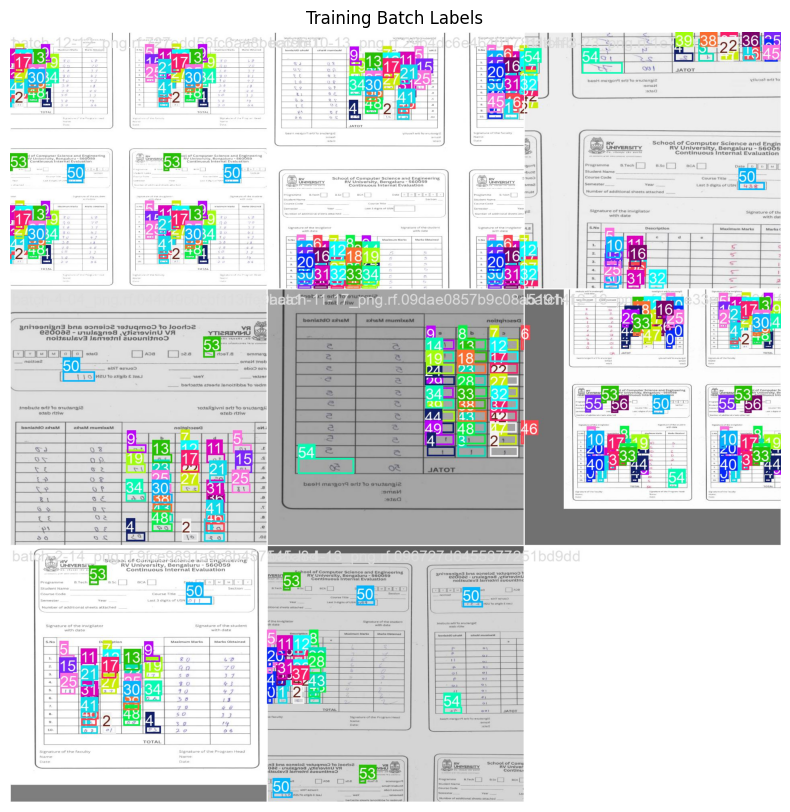

In [32]:
#loading a training batch to check labeling
train_batch = cv2.imread('/content/runs/detect/train/train_batch0.jpg')
train_batch = cv2.cvtColor(train_batch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 10))
plt.imshow(train_batch)
plt.title("Training Batch Labels")
plt.axis('off')
plt.show()

## Validation Batch Example

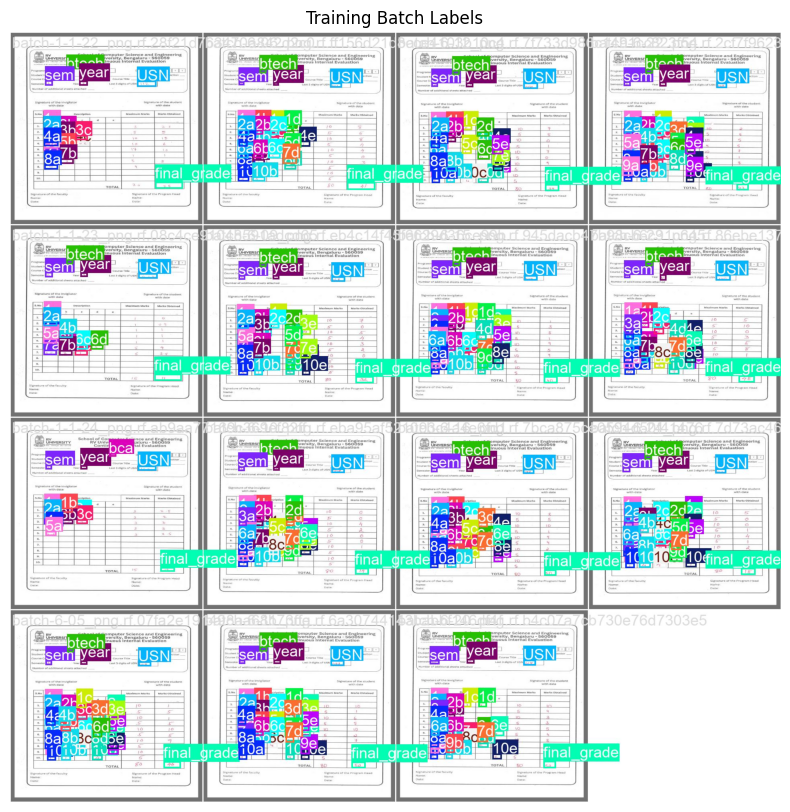

In [33]:
#loading a validation batch to check labeling
train_batch = cv2.imread('/content/runs/detect/train/val_batch1_labels.jpg')
train_batch = cv2.cvtColor(train_batch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 10))
plt.imshow(train_batch)
plt.title("Training Batch Labels")
plt.axis('off')
plt.show()

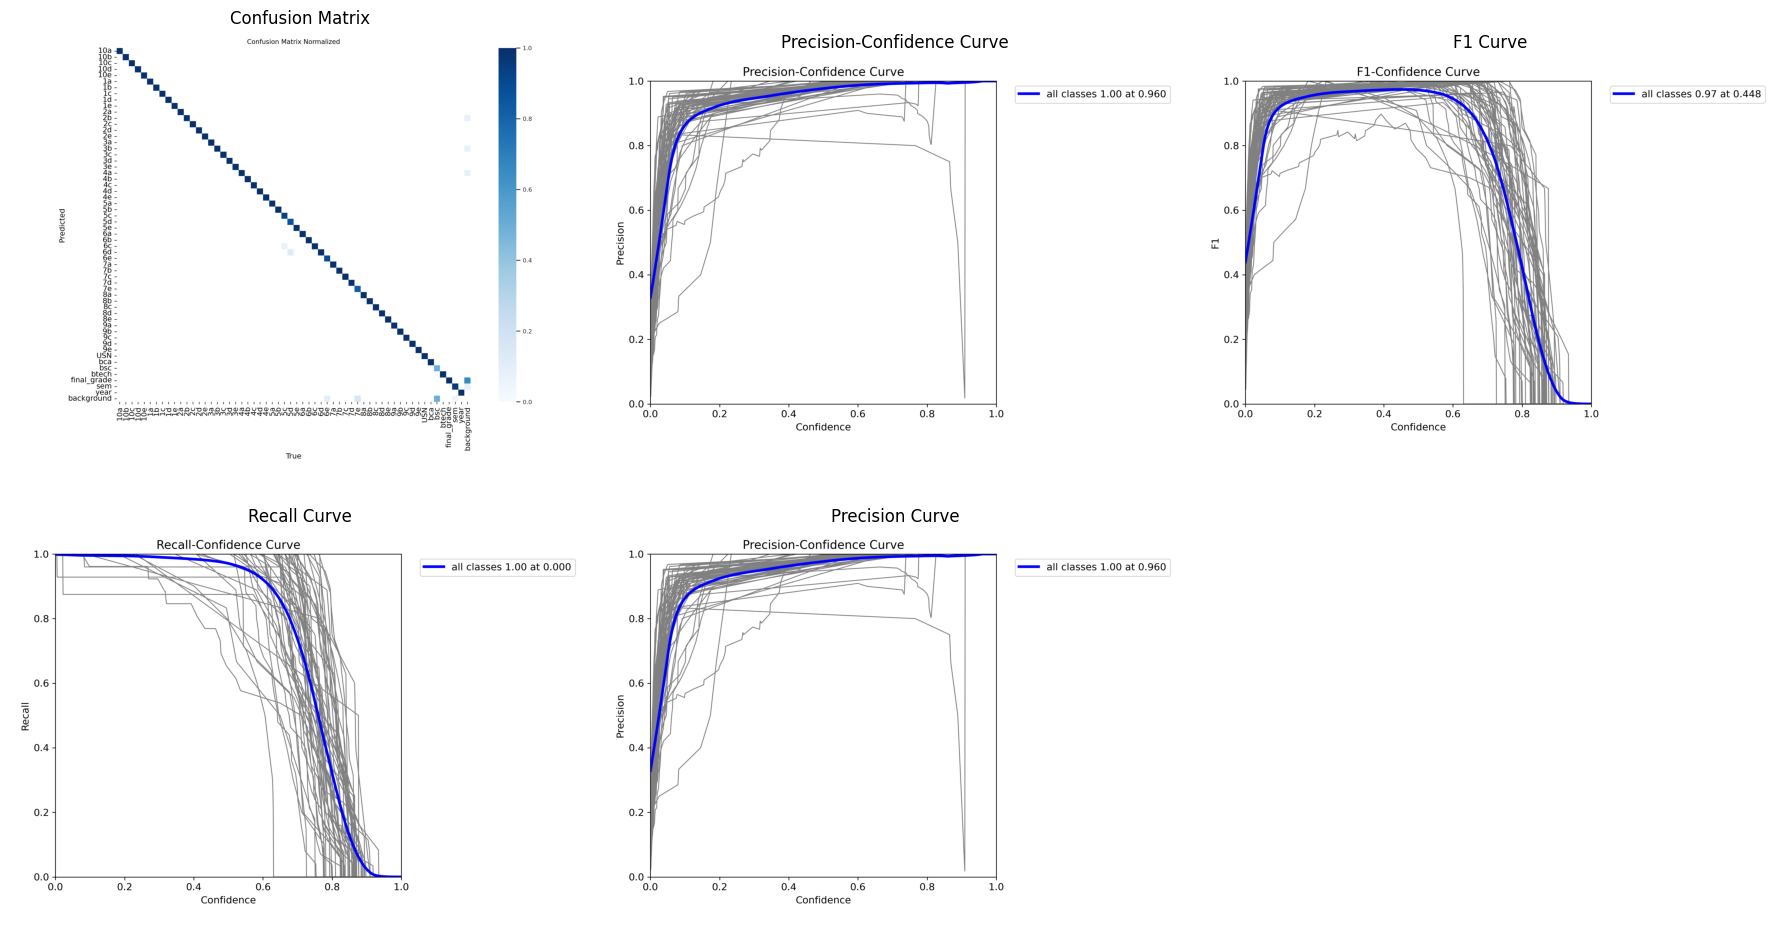

In [34]:
import cv2
import matplotlib.pyplot as plt

# Define file paths
base_path = '/content/runs/detect/train/'

conf_matrix = cv2.imread(base_path + 'confusion_matrix_normalized.png')
p_curve = cv2.imread(base_path + 'P_curve.png')
f1_curve = cv2.imread(base_path + 'F1_curve.png')
recall_curve = cv2.imread(base_path + 'R_curve.png')
precision_curve = cv2.imread(base_path + 'P_curve.png')  # reuse if same, else load different

# Convert BGR to RGB
conf_matrix = cv2.cvtColor(conf_matrix, cv2.COLOR_BGR2RGB)
p_curve = cv2.cvtColor(p_curve, cv2.COLOR_BGR2RGB)
f1_curve = cv2.cvtColor(f1_curve, cv2.COLOR_BGR2RGB)
recall_curve = cv2.cvtColor(recall_curve, cv2.COLOR_BGR2RGB)
precision_curve = cv2.cvtColor(precision_curve, cv2.COLOR_BGR2RGB)

# Plot all metrics
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.imshow(conf_matrix)
plt.title("Confusion Matrix")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(p_curve)
plt.title("Precision-Confidence Curve")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(recall_curve)
plt.title("Recall Curve")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(precision_curve)
plt.title("Precision Curve")
plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
#Final Evaluation Metrics
df = pd.read_csv('/content/runs/detect/train/results.csv')

# Show last epoch's metrics
last_epoch = df.iloc[-1]

# Extract values
precision = last_epoch['metrics/precision(B)']
recall = last_epoch['metrics/recall(B)']
map50 = last_epoch['metrics/mAP50(B)']
map50_95 = last_epoch['metrics/mAP50-95(B)']

# Print them nicely
print("Final Evaluation Metrics:")
print(f"Precision     : {precision:.3f}")
print(f"Recall        : {recall:.3f}")
print(f"mAP at 0.5       : {map50:.3f}")
print(f"mAP at 0.5 to 0.95  : {map50_95:.3f}")

Final Evaluation Metrics:
Precision     : 0.972
Recall        : 0.976
mAP at 0.5       : 0.985
mAP at 0.5 to 0.95  : 0.669


## Downloading the Model
  Here the best model is downloaded under the dataset folder - under runs/detect/train/weights - download best.pt \
  save it as MSDM_v1.pt in your machine

### TESTING WITH NEW DATA

In [41]:
#Loading the saved Model
model = YOLO("MSDM_v1.pt")

In [42]:
#upload a test image
test_img = "test.jpg"

In [43]:
# Predicting results

img = cv2.imread(test_img) # Reading image
img_resized = cv2.resize(img,(640,640)) # reszing to match training size

results = model(img_resized)# prediction the bounds


0: 640x640 1 10b, 1 10d, 1 10e, 1 1c, 1 1e, 1 2a, 1 2b, 1 2d, 1 3b, 1 4a, 1 4c, 1 4d, 1 4e, 1 5c, 1 6b, 1 6c, 1 6e, 1 7a, 1 7b, 1 7d, 1 8c, 1 9a, 1 9d, 1 9e, 1 USN, 37.1ms
Speed: 2.5ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [44]:
def plot_detections(image_path, results):
    image = cv2.imread(image_path)  # Read the image
    image = cv2.resize(image, (640, 640))  # Resize to match training size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            conf = box.conf[0].item()  # Get confidence score
            label = r.names[int(box.cls[0])]  # Get class label

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Show Image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

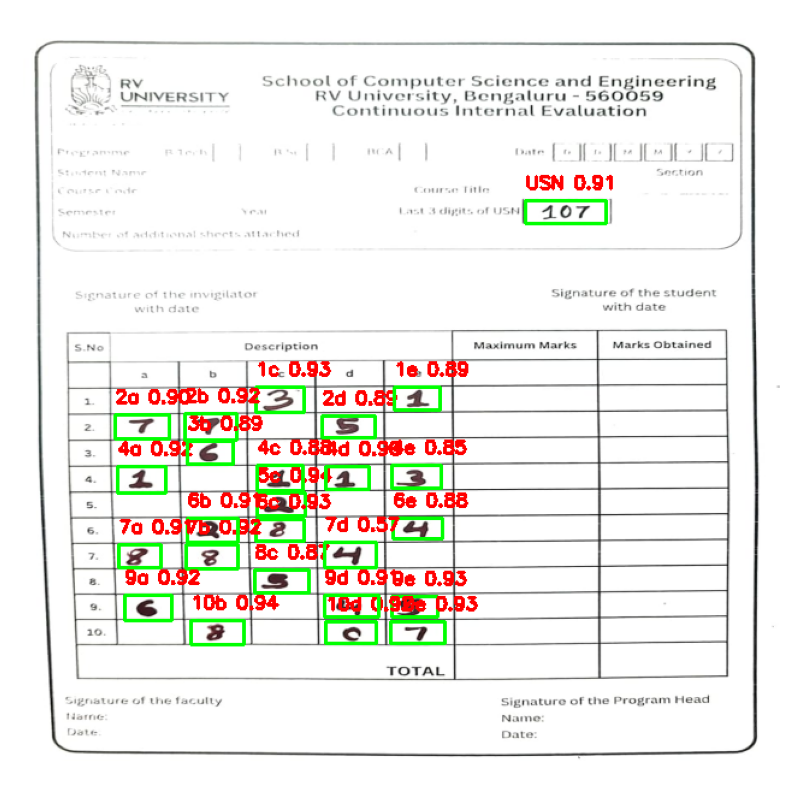

In [45]:
#displaying prediction
plot_detections(test_img, results)